<a href="https://colab.research.google.com/github/FOUNDMYPATH/Machine-Learning/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [5]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [11]:
training_data = pd.read_csv(path,names=headernames)
training_data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


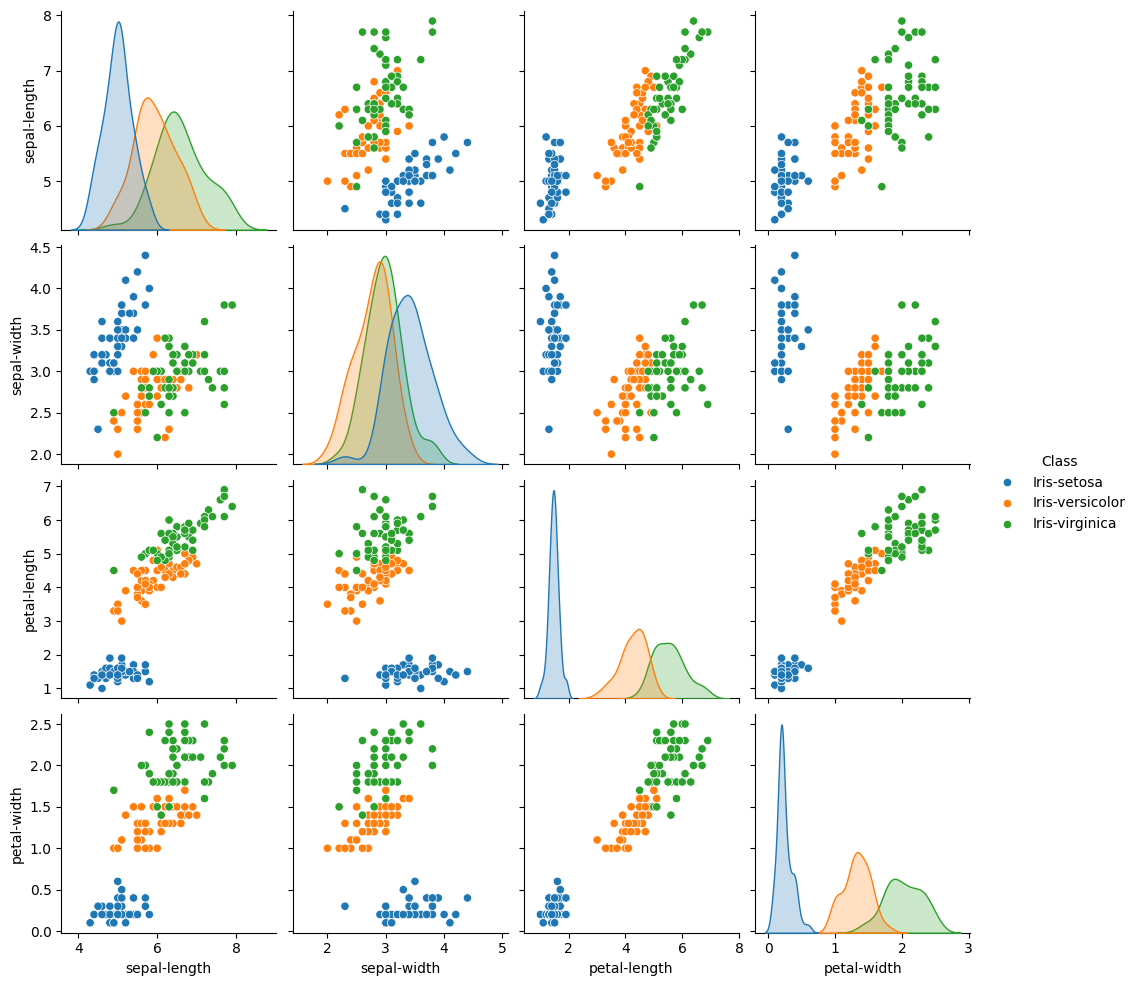

In [12]:
sns.pairplot(data = training_data,hue = "Class")

For decision tree no standard scaling is required

In [18]:
Xpd = training_data.drop("Class",axis=1)
ypd= training_data["Class"]

In [20]:
X= Xpd.values
y= ypd.values

The data that we are using is a perfectly balanced data

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [34]:
from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()
clf = DecisionTreeClassifier(criterion = "gini",max_depth=3)
end = time.time()
print("gini",end-start)
start = time.time()
clf1 = DecisionTreeClassifier(criterion = "entropy",max_depth=3)
end = time.time()
print("entropy",end-start)
start = time.time()
clf2 = DecisionTreeClassifier(criterion = "log_loss",max_depth=3)
end = time.time()
print("log-loss",end-start)

gini 0.00013446807861328125
entropy 0.000213623046875
log-loss 9.5367431640625e-05


In [35]:
def fit_model(model,*args,**kwargs):
  start = time.time()
  model.fit(*args,**kwargs)
  end = time.time()
  print("timetaken",end-start)


In [39]:
fit_model(clf,X_train,y_train)
fit_model(clf1,X_train,y_train)
fit_model(clf2,X_train,y_train)

timetaken 0.0021224021911621094
timetaken 0.0018172264099121094
timetaken 0.002167224884033203


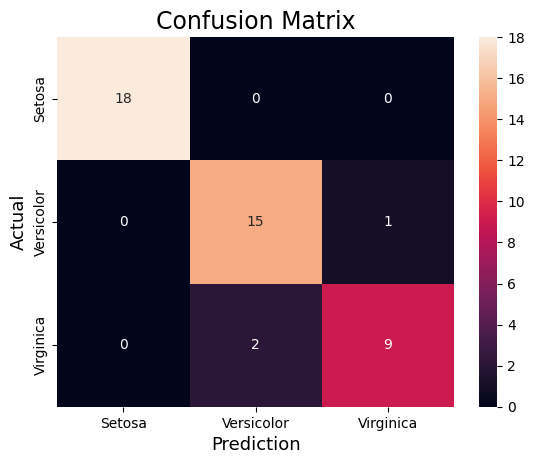

#################################
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.88      0.94      0.91        16
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.93        45
      macro avg       0.93      0.92      0.92        45
   weighted avg       0.93      0.93      0.93        45

#################################


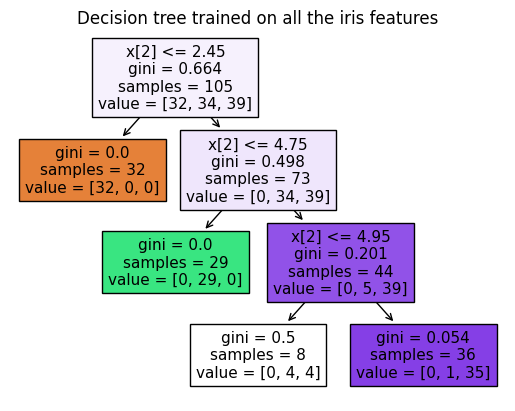

In [53]:
y_pred = clf.predict(X_test)
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

result1 = classification_report(y_test, y_pred)
print("#################################")
print("Classification Report:",)
print (result1)
print("#################################")


from sklearn.tree import plot_tree

plt.figure()
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

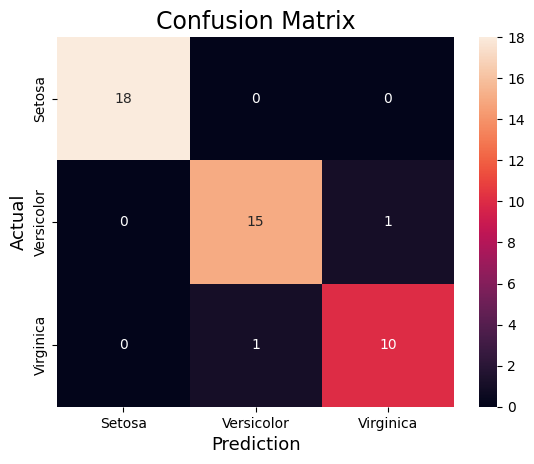

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



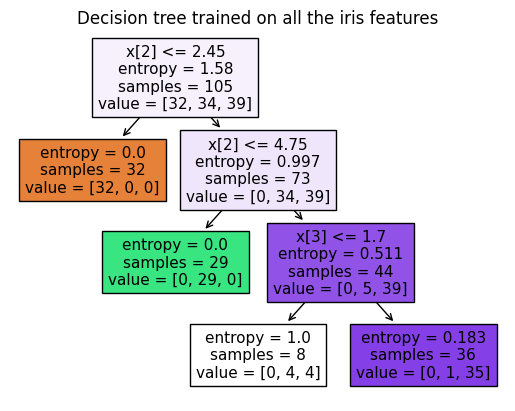

In [50]:
y_pred = clf1.predict(X_test)
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

result1 = classification_report(y_test, y_pred)
print("#################################")
print("Classification Report:",)
print (result1)
print("#################################")


plt.figure()
plot_tree(clf1, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

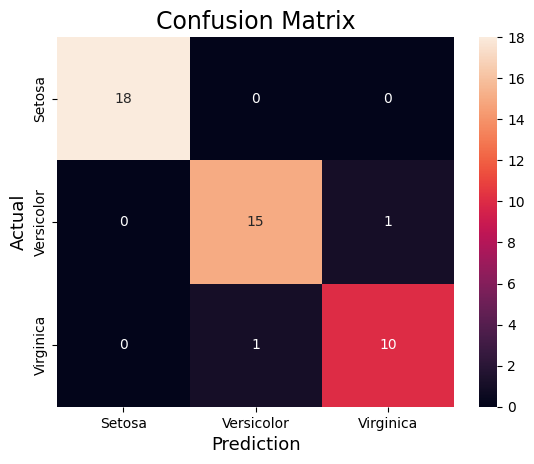

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



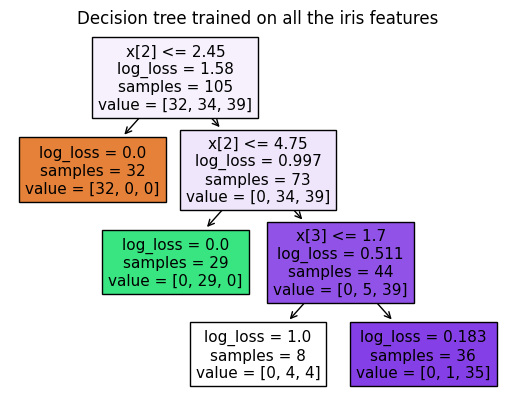

In [52]:
y_pred = clf2.predict(X_test)
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

result1 = classification_report(y_test, y_pred)
print("#################################")
print("Classification Report:",)
print (result1)
print("#################################")

plt.figure()
plot_tree(clf2, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()